# COVID-19 USA

## Tiago Pinheiro - A82491

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from qgis.core import *
from qgis.PyQt.QtGui import *
from qgis.PyQt.QtCore import *
#from IPython.display import Image

Start Qgis with GUI and start a project

In [2]:
QgsApplication.setPrefixPath(r'C:\\OSGeo4W64\\apps\\qgis', True)
qgs = QgsApplication([], True)
qgs.initQgis()
sys.path.append(r'C:\OSGeo4W64\apps\qgis\python\plugins')
project = QgsProject.instance()

Load map layer

In [3]:
path = "Testdata/tl_2017_us_state/tl_2017_us_state.shp"
map_layer = QgsVectorLayer(path, 'USA map', 'ogr')

if not map_layer.isValid():
    print("Failed to load the layer!")
else:
    project.addMapLayer(map_layer)
    print("Sucess")

Sucess


Load CSV file

In [4]:
csv_path = "file:///D:/cases_US.csv"
csv_layer = QgsVectorLayer(csv_path, 'Data', 'delimitedtext')

if not csv_layer.isValid():
    print('Layer failed to load!')
else:
    project.addMapLayer(csv_layer)
    print("Sucess")

Sucess


Join layer

In [5]:
joinName = 'Province_State'
targetName = 'NAME'

joinObject = QgsVectorLayerJoinInfo()
joinObject.setJoinFieldName(joinName)
joinObject.setTargetFieldName(targetName)
joinObject.setJoinLayerId(csv_layer.id())
joinObject.setUsingMemoryCache(True)
joinObject.setJoinLayer(csv_layer)
flag = map_layer.addJoin(joinObject)

## Gráfico do número de mortes, casos confirmados e casos recuperados

In [6]:
dict = []

for feature in map_layer.getFeatures():
    if feature['NAME']:
        state = feature['NAME']
        if feature['Data_Deaths']:
            death = feature['Data_Deaths']
        else:
            death = 0
        if feature['Data_Confirmed']:
            confirmed = feature['Data_Confirmed']
        else:
            confirmed = 0
        if feature['Data_Recovered']:
            recovered = feature['Data_Recovered']
        else:
            recovered = 0
    e = {'Name': state, 'Confirmed': confirmed, 'Death': death, 'Recovered': recovered }
    dict.append(e)

In [7]:
size = len(dict)-5

c = sorted(dict, key = lambda i: i['Confirmed'],reverse=True)
d = sorted(dict, key = lambda i: i['Death'],reverse=True)
r = sorted(dict, key = lambda i: i['Recovered'],reverse=True)

top5confirmed = c[0:5]
top5death = d[0:5]
top5recovered = r[0:5]

bottom5confirmed = c[size:]
bottom5death = d[size:]

### Top 5 Casos Confirmados

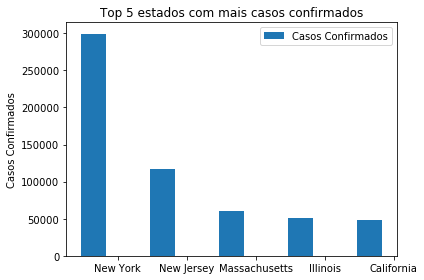

In [8]:
delta1 = [top5confirmed[0]['Confirmed'],top5confirmed[1]['Confirmed'],top5confirmed[2]['Confirmed'],top5confirmed[3]['Confirmed'],top5confirmed[4]['Confirmed']]
states = [top5confirmed[0]['Name'],top5confirmed[1]['Name'],top5confirmed[2]['Name'],top5confirmed[3]['Name'],top5confirmed[4]['Name']]

fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35

rects1 = plt.bar(index, delta1, bar_width, label='Casos Confirmados')

plt.ylabel('Casos Confirmados')
plt.title('Top 5 estados com mais casos confirmados')
plt.xticks(index + bar_width,states,)
plt.legend()

plt.tight_layout()
plt.show()

### Bottom 5 Casos Confirmados

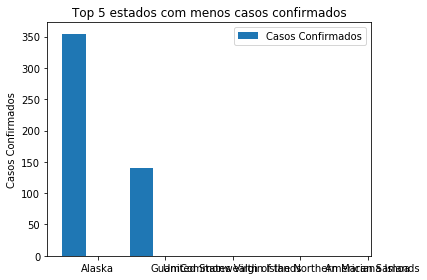

In [9]:
delta1 = [bottom5confirmed[0]['Confirmed'],bottom5confirmed[1]['Confirmed'],bottom5confirmed[2]['Confirmed'],bottom5confirmed[3]['Confirmed'],bottom5confirmed[4]['Confirmed']]
states = [bottom5confirmed[0]['Name'],bottom5confirmed[1]['Name'],bottom5confirmed[2]['Name'],bottom5confirmed[3]['Name'],bottom5confirmed[4]['Name']]

fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35

rects1 = plt.bar(index, delta1, bar_width, label='Casos Confirmados')

plt.ylabel('Casos Confirmados')
plt.title('Top 5 estados com menos casos confirmados')
plt.xticks(index + bar_width,states,)
plt.legend()

plt.tight_layout()
plt.show()

### Top 5 Mortes

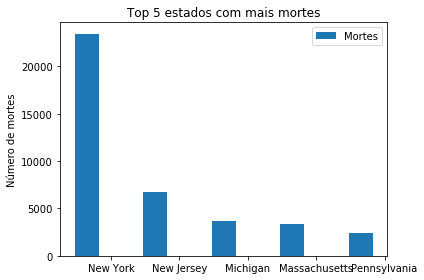

In [10]:
delta1 = [top5death[0]['Death'],top5death[1]['Death'],top5death[2]['Death'],top5death[3]['Death'],top5death[4]['Death']]
states = [top5death[0]['Name'],top5death[1]['Name'],top5death[2]['Name'],top5death[3]['Name'],top5death[4]['Name']]

fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35

rects1 = plt.bar(index, delta1, bar_width, label='Mortes')

plt.ylabel('Número de mortes')
plt.title('Top 5 estados com mais mortes')
plt.xticks(index + bar_width,states,)
plt.legend()

plt.tight_layout()
plt.show()

### Bottom 5 Mortes

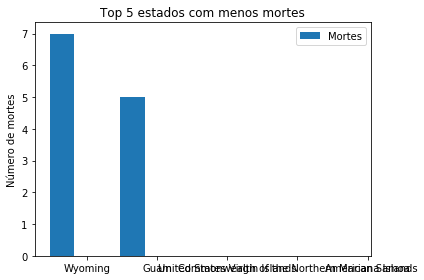

In [11]:
delta1 = [bottom5death[0]['Death'],bottom5death[1]['Death'],bottom5death[2]['Death'],bottom5death[3]['Death'],bottom5death[4]['Death']]
states = [bottom5death[0]['Name'],bottom5death[1]['Name'],bottom5death[2]['Name'],bottom5death[3]['Name'],bottom5death[4]['Name']]

fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35

rects1 = plt.bar(index, delta1, bar_width, label='Mortes')

plt.ylabel('Número de mortes')
plt.title('Top 5 estados com menos mortes')
plt.xticks(index + bar_width,states,)
plt.legend()

plt.tight_layout()
plt.show()

### Top 5 Casos Recuperados

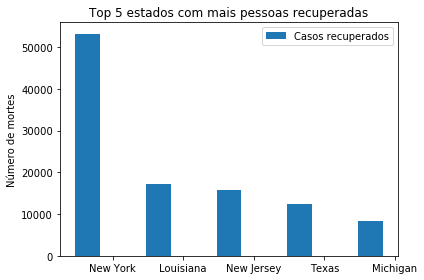

In [12]:
delta1 = [top5recovered[0]['Recovered'],top5recovered[1]['Recovered'],top5recovered[2]['Recovered'],top5recovered[3]['Recovered'],top5recovered[4]['Recovered']]
states = [top5recovered[0]['Name'],top5recovered[1]['Name'],top5recovered[2]['Name'],top5recovered[3]['Name'],top5recovered[4]['Name']]

fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35

rects1 = plt.bar(index, delta1, bar_width, label='Casos recuperados')

plt.ylabel('Número de mortes')
plt.title('Top 5 estados com mais pessoas recuperadas')
plt.xticks(index + bar_width,states,)
plt.legend()

plt.tight_layout()
plt.show()

## Active cases

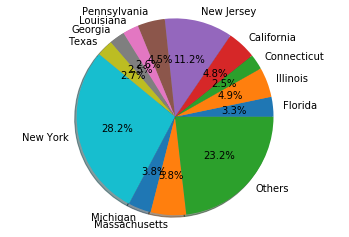

In [28]:
values = []
labels = []
total = 0
lowerTotal = 0
i = 0

for feature in map_layer.getFeatures():
    if feature['Data_Active']:
        total += feature['Data_Active']

for feature in map_layer.getFeatures():
    if feature['Data_Active']:
        if (feature['Data_Active']/total) > 0.025:
            values.append(feature['Data_Active'])
            labels.append(feature['NAME'])
        else:
            lowerTotal += feature['Data_Active']

values.append(lowerTotal)
labels.append("Others")

plt.pie(values, labels=labels, shadow=True, autopct='%1.1f%%')
plt.axis('equal')
plt.show()